# Grid World

We solve the Grid World problem from SB v2 Example 3.5 for the random policy and optimal policy using DP and GPI.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import seaborn as sns
from tqdm import tqdm

In [4]:
class Env:
    
    def step(self,y,x,a):
        """
        y: Vertical Location In Descending Order
        x: Horizontal Location Left To Right
        a: Action 0: move down, 1: move left, 2: move up, 3: move right, 4: no action
        """
        r=0

        if a==4:
            return y,x,0

        if x==1 and y==0:
            r=10
            xp=x
            yp=4
        elif x==3 and y==0:
            r=5
            xp=x
            yp=2
        elif a==0:
            xp=x
            yp=y-1
        elif a==1:
            xp=x-1
            yp=y
        elif a==2:
            xp=x
            yp=y+1
        elif a==3:
            xp=x+1
            yp=y

        if xp<0:
            xp=0
            r=-1
        elif xp>4:
            xp=4
            r=-1
        elif yp<0:
            yp=0
            r=-1
        elif yp>4:
            yp=4
            r=-1
        return yp,xp,r
        

In [5]:
e=Env()

In [6]:
# Random Policy

vs=np.zeros((5,5))
gamma=.9
for _ in range(100):
    for iy in range(5):
        for ix in range(5):
            v=vs[iy][ix]
            z=[]
            for a in range(4):
                fy,fx,r = e.step(iy,ix,a)
                z.append(r +  gamma*vs[fy][fx])
            vs[iy][ix]=np.mean(z)

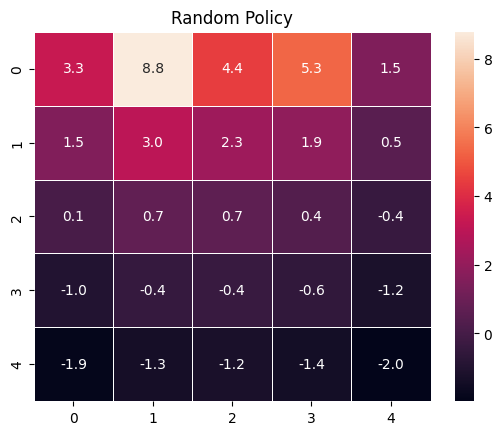

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

ax = sns.heatmap(vs, annot=np.asarray(['{:.1f}'.format(x) for x in vs.flatten()]).reshape(vs.shape),fmt="",linewidth=0.5)
plt.title('Random Policy')
plt.show()

In [10]:
# GPI

vs=np.zeros((5,5))
gamma=.9
for _ in range(100):
    for iy in range(5):
        for ix in range(5):
            v=vs[iy][ix]
            z=[]
            for a in range(5):
                fy,fx,r = e.step(iy,ix,a)
                z.append(r +  gamma*vs[fy][fx])
            vs[iy][ix]=np.max(z)

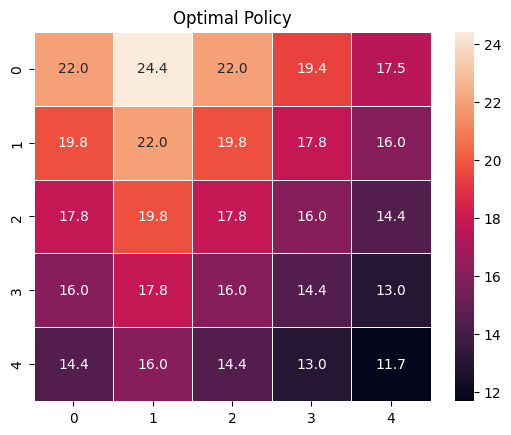

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

ax = sns.heatmap(vs, annot=np.asarray(['{:.1f}'.format(x) for x in vs.flatten()]).reshape(vs.shape),fmt="",linewidth=0.5)
plt.title('Optimal Policy')
plt.show()